# Guassian Process Regression

### GPR is non-parametric. This means it learns largely from the data itself, rather than by learning an extensive set of parameters. This is especially advantageous because this results in GPR models not being as data-hungry as highly parametric models, such as neural networks, i.e. they don’t need as many samples to achieve strong generalizability.

### For interpolation and prediction tasks, GPR estimates both expected values and uncertainty. This is especially beneficial for decision-making systems that take this uncertainty into account when making decisions.

### GPR is a linear smoother [5] — from a supervised learning lens, this can be conceptualized as a regularization technique. From a Bayesian lens, this is equivalent to imposing a prior on your model that all targets on test points must be linear combinations of existing training targets. This attribute helps GPR to generalize to unseen data, so long as the true unseen targets can be represented as linear combinations of training targets.

### With automatic differentiation backend frameworks such as torch and tensorflow, which are integrated through GPR packages such as gpytorch and gpflow, GPR is lightning fast and scalable. This is particularly true for batched models.

In [4]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, DotProduct, RBF
import matplotlib.pyplot as plt
import numpy as np

Randomizing seed

In [5]:
np.random.seed(seed=0)
random_state = 0

Generating dataset

In [6]:
x = np.random.normal(loc =0, scale=1, size=(50,1)) # Draw random samples from a normal (Gaussian) distribution. here loc => mean, scale => S.D. and size => Output shape

y = np.sin(x) # generate y using sin of x

GPR Definition

In [7]:
kernel = RBF() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel, random_state=random_state)

Fitting

In [8]:
gpr.fit(x, y)

c:\Python310\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=RBF(length_scale=1) + WhiteKernel(noise_level=1),
                         random_state=0)

Creating Test data

In [9]:
x_test = np.random.normal(loc=0, scale=1, size=(50, 1))
y_test = np.sin(x_test)

Predicting the mean

In [10]:
y_hat, y_sigma = gpr.predict(x_test, return_std=True)

Plotting

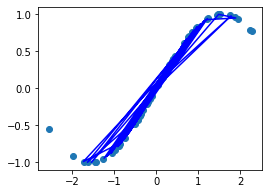

In [15]:
# Initialize plot
f, ax = plt.subplots(1, 1, figsize=(4, 3))

# Squeeze data => to remove dimensions of length 1
x = np.squeeze(x)
y = np.squeeze(y)
x_test = np.squeeze(x_test)
y_test = np.squeeze(y_test)

# Plot the training data
ax.scatter(x, y)

# Plot predictive means as blue line
ax.plot(x_test, y_hat, 'b')